<a href="https://colab.research.google.com/github/Karmegha-Kuzhali/Thirukkural_analysis/blob/main/Thirukkural_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/thirukkural analysis/data/Thirukural.csv")

In [ ]:
df.head()

,Chapter Name,Section Name,Verse,Translation
0,அறத்துப்பால்,கடவுள் வாழ்த்து,அகர\tமுதல\tஎழுத்தெல்லாம்\tஆதி\t\t\tபகவன்\tமுதற...,"A, as its first of letters, every speech maint..."
1,அறத்துப்பால்,கடவுள் வாழ்த்து,கற்றதனால்\tஆய\tபயனென்கொல்\tவாலறிவன்\t\t\tநற்றா...,"No fruit have men of all their studied lore, S..."
2,அறத்துப்பால்,கடவுள் வாழ்த்து,மலர்மிசை\tஏகினான்\tமாணடி\tசேர்ந்தார்\t\t\tநிலம...,"His feet, 'Who o'er the full-blown flower hath..."
3,அறத்துப்பால்,கடவுள் வாழ்த்து,வேண்டுதல்\tவேண்டாமை\tஇலானடி\tசேர்ந்தார்க்கு\t\...,"His foot, 'Whom want affects not, irks not gri..."
4,அறத்துப்பால்,கடவுள் வாழ்த்து,இருள்சேர்\tஇருவினையும்\tசேரா\tஇறைவன்\t\t\tபொரு...,"The men, who on the 'King's' true praised deli..."


# Imports


In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans,kmeans_plusplus,AgglomerativeClustering
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from collections import Counter
from scipy.stats import entropy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

# Analysis


SO let us start with the basics. (I know these as I've read this)

In [ ]:
df['Chapter Name'].value_counts()

,count
Chapter Name,
பொருட்பால்,700
அறத்துப்பால்,380
காமத்துப்பால்,250


#### Translation vs Original

Let us apply same transformers and learn with the same set of learners on both and see do they really perform similar

Let us <strong>split</strong> the data

In [ ]:
X,y=df[['Verse','Translation']],df['Chapter Name']

In [ ]:
ct_eng=ColumnTransformer([
    ('Eng',OneHotEncoder(),['Translation'])
])
ct_tam=ColumnTransformer([
    ('Tam',OneHotEncoder(),['Verse'])
])

In [ ]:
X_eng=ct_eng.fit_transform(X)
X_tam=ct_tam.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_eng,y,test_size=0.3,random_state=42)

In [ ]:
mlp_eng=MLPClassifier(hidden_layer_sizes=(10,15),alpha=5)

In [ ]:
mlp_eng.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=5, hidden_layer_sizes=(10, 15))

In [ ]:
print("Train for English: ",mlp_eng.score(X_train,y_train))
print("Train for English: ",mlp_eng.score(X_test,y_test))

Train for English:  0.527389903329753
Train for English:  0.5238095238095238


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_tam,y,test_size=0.3,random_state=42)

In [ ]:
mlp_tam=MLPClassifier(hidden_layer_sizes=(10,15),alpha=4)

In [ ]:
mlp_tam.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=4, hidden_layer_sizes=(10, 15))

In [ ]:
print("Train for English: ",mlp_tam.score(X_train,y_train))
print("Train for English: ",mlp_tam.score(X_test,y_test))

Train for English:  0.527389903329753
Train for English:  0.5238095238095238


In [ ]:
np.not_equal(X_tam.toarray(),X_eng.toarray())

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
X_tam.toarray().shape, X_eng.toarray().shape

((1330, 1330), (1330, 1330))

### Let us try clustering huh?!

In [ ]:
km=AgglomerativeClustering(n_clusters=3,linkage='average')

In [ ]:
km.fit(X_eng.toarray())

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
y_eng=km.fit_predict(X_eng.toarray())

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_eng,y_eng,test_size=0.3,random_state=42)

In [ ]:
svm=SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
svm.score(X_train,y_train)

0.7808807733619764

In [ ]:
svm.score(X_test,y_test)

0.7844611528822055

In [ ]:
pd.Series(y_eng).value_counts()

,count
0,1040
2,145
1,145


In [ ]:
df['Chapter Name'].value_counts()

,count
Chapter Name,
பொருட்பால்,700
அறத்துப்பால்,380
காமத்துப்பால்,250


In [ ]:
print(list(df['Chapter Name']))

['அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால் ', 'அறத்துப்பால்

In [ ]:
print(list(y_eng))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

அறத்துப்பால் = 0
பொருட்பால் =2
காமத்துப்பால் =1

### Let's do this with Tamil

In [ ]:
km_tam=AgglomerativeClustering(n_clusters=3,linkage='average')

In [ ]:
y_tam=km_tam.fit_predict(X_tam.toarray())

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_tam,y_tam,test_size=0.3,random_state=42)

In [ ]:
svm.fit(X_train,y_train)
print(svm.score(X_train,y_train))
svm.score(X_test,y_test)

0.7808807733619764


0.7844611528822055

In [ ]:
pd.Series(y_tam).value_counts()

,count
0,1040
2,145
1,145


Funny how the clustering seems too similar?!?!?


## Trying other models

### Cramer's V measure

In [ ]:
confusion_matrix = pd.crosstab(df['Verse'],df['Translation'])
chi2 = chi2_contingency(confusion_matrix)[0]
n = confusion_matrix.sum().sum()
r, k = confusion_matrix.shape
print(np.sqrt(chi2 / (n * (min(r, k) - 1))))

0.9999999999999984


### Thiel's U

In [ ]:
px = Counter(df['Verse'])
py = Counter(df['Translation'])
pxy = Counter(zip(df['Verse'], df['Translation']))
hx = entropy(list(px.values()), base=2)
hxy = entropy(list(pxy.values()), base=2)
print((hx - hxy) / hx)

0.0


### Chi-2 **bold text**

In [ ]:
confusion_matrix = pd.crosstab(df['Verse'],df['Translation'])
chi2, p, _, _ = chi2_contingency(confusion_matrix)
print(p)

0.2396949442881085


# Transformers

In [ ]:
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
trf = SentenceTransformer('distiluse-base-multilingual-cased-v2')

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [ ]:
embeddings_Tam = trf.encode(df['Verse'].tolist(), convert_to_tensor=False)
embeddings_english = trf.encode(df['Translation'].tolist(), convert_to_tensor=False)

In [ ]:
cosine_similarities = util.pytorch_cos_sim(embeddings_Tam, embeddings_english).diagonal()

sim=cosine_similarities.cpu().numpy()

In [ ]:
max(sim),min(sim)

(0.11569689, -0.11961702)

Ho Ho! That's quite somethin

In [ ]:
km=AgglomerativeClustering(n_clusters=3)

In [ ]:
y_eng=km.fit_predict(embeddings_english)

In [ ]:
y_tam=km.fit_predict(embeddings_Tam)

In [ ]:
pd.Series(y_eng).value_counts()

,count
0,1019
1,247
2,64


In [ ]:
df['Chapter Name'].value_counts()

,count
Chapter Name,
பொருட்பால்,700
அறத்துப்பால்,380
காமத்துப்பால்,250


In [ ]:
pd.Series(y_tam).value_counts()

,count
2,502
0,433
1,395


In [ ]:
cm=confusion_matrix(LabelEncoder().fit_transform(df['Chapter Name']),y_tam)

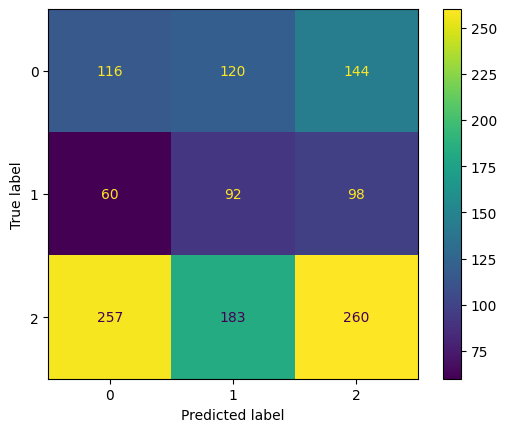

In [ ]:
cd=ConfusionMatrixDisplay(cm)
cd.plot();

In [ ]:
cm=confusion_matrix(LabelEncoder().fit_transform(df['Chapter Name']),y_eng)

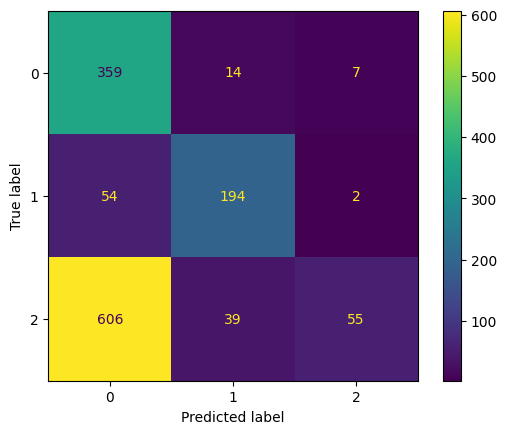

In [ ]:
cd=ConfusionMatrixDisplay(cm)
cd.plot();

I really don't have the slightest reason on this behaviour, guess English is a bit better

In [ ]:
X_eng,y=embeddings_english,df['Chapter Name']
X_tam,y=embeddings_Tam,df['Chapter Name']

In [ ]:
X_eng_train,X_eng_test,y_eng_train,y_eng_test=train_test_split(X_eng,y,test_size=0.3,random_state=42)
X_tam_train,X_tam_test,y_tam_train,y_tam_test=train_test_split(X_tam,y,test_size=0.3,random_state=42)

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=(10,15),max_iter=600,alpha=3,activation='relu')

In [ ]:
nn.fit(X_eng_train,y_eng_train)

MLPClassifier(alpha=3, hidden_layer_sizes=(10, 15), max_iter=600)

In [ ]:
print(classification_report(y_eng_train,nn.predict(X_eng_train)))

                precision    recall  f1-score   support

 அறத்துப்பால்        0.85      0.76      0.80       262
காமத்துப்பால்        0.97      0.93      0.95       178
   பொருட்பால்        0.87      0.93      0.90       491

      accuracy                           0.88       931
     macro avg       0.89      0.87      0.88       931
  weighted avg       0.88      0.88      0.88       931



In [ ]:
print(classification_report(y_eng_test,nn.predict(X_eng_test)))

                precision    recall  f1-score   support

 அறத்துப்பால்        0.63      0.51      0.56       118
காமத்துப்பால்        0.91      0.89      0.90        72
   பொருட்பால்        0.74      0.83      0.79       209

      accuracy                           0.75       399
     macro avg       0.76      0.74      0.75       399
  weighted avg       0.74      0.75      0.74       399



In [ ]:
nn_tam=MLPClassifier(hidden_layer_sizes=(10,15),max_iter=500)

In [ ]:
nn_tam.fit(X_tam_train,y_tam_train)

MLPClassifier(hidden_layer_sizes=(10, 15), max_iter=500)

In [ ]:
print(classification_report(y_tam_train,nn_tam.predict(X_tam_train)))

                precision    recall  f1-score   support

 அறத்துப்பால்        0.00      0.00      0.00       262
காமத்துப்பால்        0.00      0.00      0.00       178
   பொருட்பால்        0.53      1.00      0.69       491

      accuracy                           0.53       931
     macro avg       0.18      0.33      0.23       931
  weighted avg       0.28      0.53      0.36       931



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(classification_report(y_tam_test,nn_tam.predict(X_tam_test)))

                precision    recall  f1-score   support

 அறத்துப்பால்        0.00      0.00      0.00       118
காமத்துப்பால்        0.00      0.00      0.00        72
   பொருட்பால்        0.52      1.00      0.69       209

      accuracy                           0.52       399
     macro avg       0.17      0.33      0.23       399
  weighted avg       0.27      0.52      0.36       399



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
lr_tam=LogisticRegression(max_iter=1000,C=0.01)

In [ ]:
lr_tam.fit(X_tam_train,y_tam_train)

LogisticRegression(C=0.01, max_iter=1000)

In [ ]:
lr_tam.score(X_tam_train,y_tam_train)

0.527389903329753

In [ ]:
lr_tam.score(X_tam_test,y_tam_test)

0.5238095238095238

In [ ]:
nb_tam=GaussianNB()

In [ ]:
nb_tam.fit(X_tam_train,y_tam_train)

GaussianNB()

In [ ]:
nb_tam.score(X_tam_train,y_tam_train)

0.439312567132116

In [ ]:
nb_tam.score(X_tam_test,y_tam_test)

0.41353383458646614